# Aprendizaje no supervisado(Consumo Consciente)

## Creado por: Equipo consumo consciente

### Asignatura: Extracción de Conocimiento en Base de Datos

### PE: Ingeniería en Desarrollo y Gestión de Software -9°B

In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
cc_dataset=pd.read_csv("all_products.csv")
cc_dataset.head()

,id,name,category,price,quantity,status,carbon_footprint,recyclable_packaging,local_origin,text,cluster,carbon_score,price_score,sustentabilidad_score,score
0,1,Tabla de cortar de cera (Hecho a mano) 22222,Hogar,145.06,1,disponible,11.76,0,0,Hogar 0 0,0,0.772440,0.281642,0.257480,0.258572
1,2,Miel pura de orgánico (Energético),Alimentos,180.00,1,disponible,4.63,1,1,Alimentos 1 1,0,0.917566,0.102168,0.972522,0.312190
2,3,Bolsa de tela de upcycled (Multiusos),Otro,97.11,69,disponible,7.28,1,1,Otro 1 1,3,0.863627,0.527943,0.954542,0.454451
3,4,Hilo dental de orgánico (Dermatológico),Salud,71.73,68,disponible,5.77,1,0,Salud 1 0,0,0.894362,0.658311,0.631454,0.321098
4,7,Jabón de Sin quimicos (Sin fragancia),Limpieza,195.64,45,disponible,5.46,1,0,Limpieza 1 0,1,0.900672,0.021831,0.633557,0.444433


In [9]:
cc_dataset.tail()

,id,name,category,price,quantity,status,carbon_footprint,recyclable_packaging,local_origin,text,cluster,carbon_score,price_score,sustentabilidad_score,score
145,184,Velas decorativas de hecho a mano (Multiusos),Otro,37.10,65,disponible,3.26,1,1,Otro 1 1,3,0.945451,0.836193,0.981817,0.524284
146,185,Desinfectante natural de orgánico (Sin fragancia),Limpieza,95.58,100,disponible,5.02,0,0,Limpieza 0 0,1,0.909628,0.535802,0.303209,0.448123
147,186,Suplemento vitamínico de sin quimicos (Dermato...,Salud,196.78,40,disponible,8.30,1,0,Salud 1 0,0,0.842866,0.015975,0.614289,0.187482
148,188,Agenda anual de cartón reciclado (Plantable),Papeleria,143.67,91,disponible,5.98,1,0,Papeleria 1 0,4,0.890088,0.288782,0.630029,0.309265
149,190,Desinfectante natural de Sin quimicos (Concent...,Limpieza,70.50,92,disponible,3.43,1,1,Limpieza 1 1,1,0.941991,0.664629,0.980664,0.677125


In [11]:
cc_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     150 non-null    int64  
 1   name                   150 non-null    object 
 2   category               150 non-null    object 
 3   price                  150 non-null    float64
 4   quantity               150 non-null    int64  
 5   status                 150 non-null    object 
 6   carbon_footprint       150 non-null    float64
 7   recyclable_packaging   150 non-null    int64  
 8   local_origin           150 non-null    int64  
 9   text                   150 non-null    object 
 10  cluster                150 non-null    int64  
 11  carbon_score           150 non-null    float64
 12  price_score            150 non-null    float64
 13  sustentabilidad_score  150 non-null    float64
 14  score                  150 non-null    float64
dtypes: flo

In [6]:
ccrecomendation_dataset=pd.read_csv("recomendaciones_usuario_1.csv")
ccrecomendation_dataset.head()

,id,name,category,price,quantity,status,carbon_footprint,recyclable_packaging,local_origin,text,cluster,carbon_score,price_score,sustentabilidad_score,score
0,190,Desinfectante natural de Sin quimicos (Concent...,Limpieza,70.50,92,disponible,3.43,1,1,Limpieza 1 1,1,0.941991,0.664629,0.980664,0.677125
1,104,Jabón de Sin quimicos (Zero waste),Limpieza,22.80,56,disponible,4.43,1,0,Limpieza 1 0,1,0.921636,0.909647,0.640545,0.624093
2,75,Cepillo de madera de orgánico (Sin fragancia),Limpieza,35.91,10,disponible,3.62,1,0,Limpieza 1 0,1,0.938123,0.842305,0.646041,0.612273
3,78,Limpiador multiusos de biodegradable (Concentr...,Limpieza,149.19,86,disponible,2.04,1,1,Limpieza 1 1,1,0.970283,0.260427,0.990094,0.599114
4,43,Cepillo de madera de biodegradable (Concentrado),Limpieza,65.31,42,disponible,2.38,0,1,Limpieza 0 1,1,0.963363,0.691288,0.654454,0.584594


In [10]:
ccrecomendation_dataset.tail()

,id,name,category,price,quantity,status,carbon_footprint,recyclable_packaging,local_origin,text,cluster,carbon_score,price_score,sustentabilidad_score,score
0,190,Desinfectante natural de Sin quimicos (Concent...,Limpieza,70.50,92,disponible,3.43,1,1,Limpieza 1 1,1,0.941991,0.664629,0.980664,0.677125
1,104,Jabón de Sin quimicos (Zero waste),Limpieza,22.80,56,disponible,4.43,1,0,Limpieza 1 0,1,0.921636,0.909647,0.640545,0.624093
2,75,Cepillo de madera de orgánico (Sin fragancia),Limpieza,35.91,10,disponible,3.62,1,0,Limpieza 1 0,1,0.938123,0.842305,0.646041,0.612273
3,78,Limpiador multiusos de biodegradable (Concentr...,Limpieza,149.19,86,disponible,2.04,1,1,Limpieza 1 1,1,0.970283,0.260427,0.990094,0.599114
4,43,Cepillo de madera de biodegradable (Concentrado),Limpieza,65.31,42,disponible,2.38,0,1,Limpieza 0 1,1,0.963363,0.691288,0.654454,0.584594


In [12]:
ccrecomendation_dataset.info() #vemos la informaciòn del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5 non-null      int64  
 1   name                   5 non-null      object 
 2   category               5 non-null      object 
 3   price                  5 non-null      float64
 4   quantity               5 non-null      int64  
 5   status                 5 non-null      object 
 6   carbon_footprint       5 non-null      float64
 7   recyclable_packaging   5 non-null      int64  
 8   local_origin           5 non-null      int64  
 9   text                   5 non-null      object 
 10  cluster                5 non-null      int64  
 11  carbon_score           5 non-null      float64
 12  price_score            5 non-null      float64
 13  sustentabilidad_score  5 non-null      float64
 14  score                  5 non-null      float64
dtypes: float64

### 3. Procesamiento

In [7]:
## Limpieza y selección de características**

# Seleccionar columnas numéricas y relevantes para clustering
# Ajusta estos nombres si cambian en tu CSV
features = ['price', 'quantity', 'carbon_footprint', 'recyclable_packaging', 'local_origin',
            'carbon_score', 'price_score', 'sustentabilidad_score', 'score']

# Asegurarnos que existan en el dataset
features = [f for f in features if f in cc_dataset.columns]

data = cc_dataset[features].copy()

# Rellenar NA si los hay
data = data.fillna(data.median())

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(data)

print('Shape X:', X.shape)

Shape X: (150, 9)


Componentes retenidos: 5


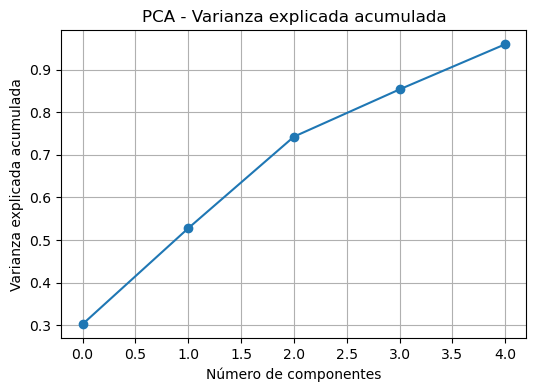

In [8]:
### 5.1 PCA: varianza explicada y scatter en 2 componentes

# PCA
pca = PCA(n_components=0.95)  # conservar 95% varianza
X_pca = pca.fit_transform(X)
print('Componentes retenidos:', pca.n_components_)

# PCA 2D para visualización
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

# Gráfico: varianza explicada acumulada
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('PCA - Varianza explicada acumulada')
plt.grid(True)
plt.show()

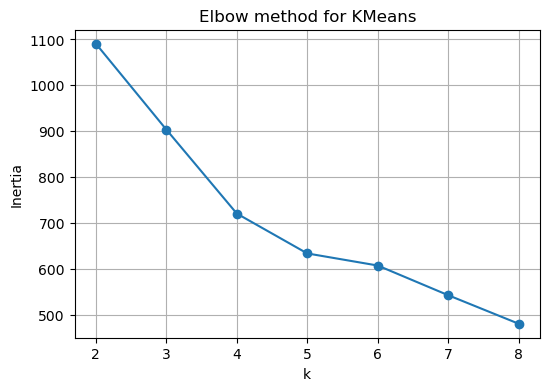

In [9]:

### 5.2 K-Means: Elbow y Silhouette

# Elbow
inertia = []
K = range(2,9)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow method for KMeans')
plt.grid(True)
plt.show()

Silhouette score (k=4): 0.2409


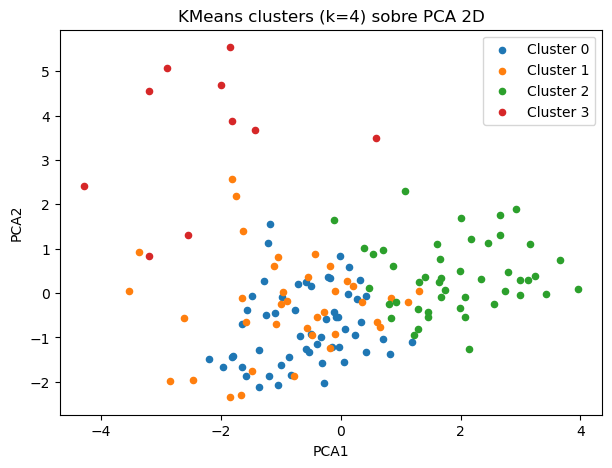

In [11]:

# Elegir k (por ejemplo elbow -> k_opt)
k_opt = 4  # sustituye si en tu caso es otro
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels_k = kmeans.fit_predict(X)

# Silhouette
sil = silhouette_score(X, labels_k)
print('Silhouette score (k={}): {:.4f}'.format(k_opt, sil))

# Visualizar clusters en PCA 2D
plt.figure(figsize=(7,5))
for cl in np.unique(labels_k):
    idx = labels_k == cl
    plt.scatter(X_pca2[idx,0], X_pca2[idx,1], label=f'Cluster {cl}', s=20)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f'KMeans clusters (k={k_opt}) sobre PCA 2D')
plt.legend()
plt.show()

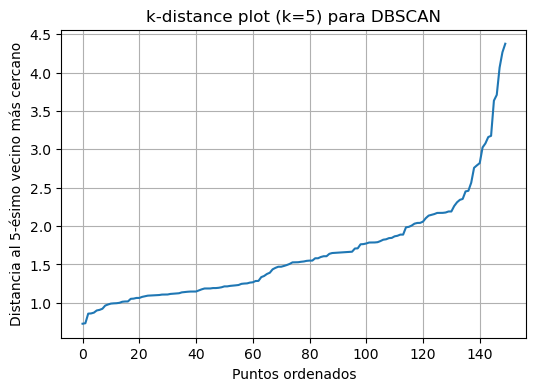

In [13]:
### 5.3 DBSCAN: k-distance plot y clustering
# k-distance plot (k = min_samples)
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances[:,4])

plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title('k-distance plot (k=5) para DBSCAN')
plt.ylabel('Distancia al 5-ésimo vecino más cercano')
plt.xlabel('Puntos ordenados')
plt.grid(True)
plt.show()

DBSCAN clusters (sin contar ruido): 3


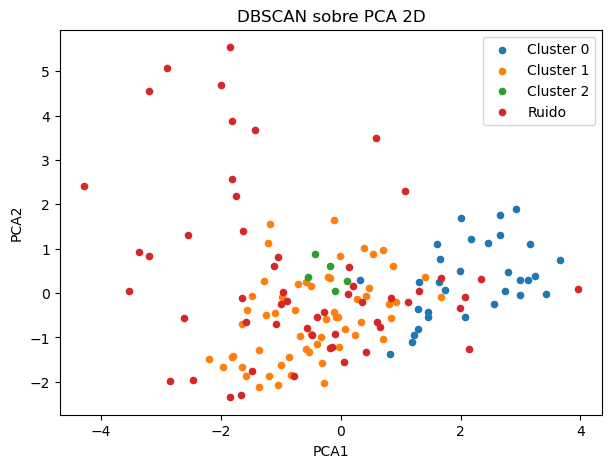

In [14]:

# Probar DBSCAN con eps estimado
db = DBSCAN(eps=1.5, min_samples=5)
labels_db = db.fit_predict(X)

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print('DBSCAN clusters (sin contar ruido):', n_clusters_db)

# Visualizar
plt.figure(figsize=(7,5))
for cl in set(labels_db):
    idx = labels_db == cl
    lbl = 'Ruido' if cl == -1 else f'Cluster {cl}'
    plt.scatter(X_pca2[idx,0], X_pca2[idx,1], label=lbl, s=20)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('DBSCAN sobre PCA 2D')
plt.legend()
plt.show()

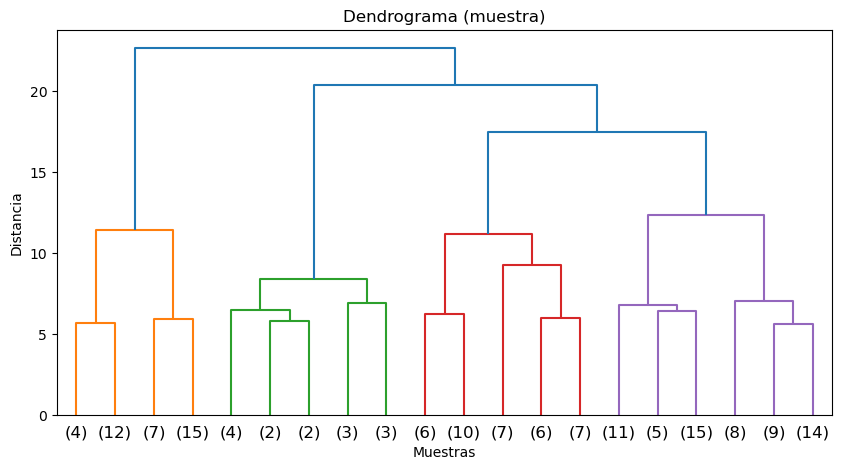

In [17]:

### 5.4 Clustering jerárquico (dendrograma)
# Para dendrograma suele usarse una subsample si hay muchos puntos
sample_idx = np.random.choice(range(X.shape[0]), size=min(200, X.shape[0]), replace=False)
X_sample = X[sample_idx]

linked = linkage(X_sample, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Dendrograma (muestra)')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

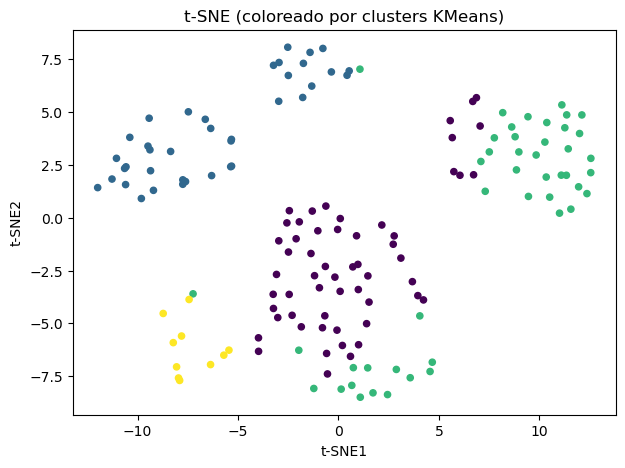

In [18]:
### 5.5 Visualización no lineal: t-SNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_k, s=20)
plt.title('t-SNE (coloreado por clusters KMeans)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [19]:
### 5.6 Detección de anomalías: IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
anoms = iso.fit_predict(X)  # -1 anomalía, 1 normal

# Mostrar los top 10 anomalías (si hay)
anomaly_idx = np.where(anoms == -1)[0]
print('Número de anomalías detectadas:', len(anomaly_idx))
cc_dataset.iloc[anomaly_idx].head(10)

Número de anomalías detectadas: 2


,id,name,category,price,quantity,status,carbon_footprint,recyclable_packaging,local_origin,text,cluster,carbon_score,price_score,sustentabilidad_score,score
69,86,Ratón de bambú de plástico reciclado (Eficienc...,Tecnologia,172.90,88,disponible,48.18,1,1,Tecnologia 1 1,0,0.031142,0.138638,0.677047,0.230842
105,132,Auriculares inalámbricos de metales reciclados...,Tecnologia,11.01,24,disponible,43.19,1,0,Tecnologia 1 0,0,0.132709,0.970208,0.377570,0.307312


In [20]:
### 5.7 Recomendador por similitud (Cosine)

# Usar las mismas features escaladas X
sim = cosine_similarity(X)

# Función para obtener top-N similares a un producto (por index)
def get_similar_products(product_index, top_n=5):
    scores = sim[product_index]
    idx_sorted = np.argsort(scores)[::-1]
    idx_sorted = idx_sorted[idx_sorted != product_index]
    return cc_dataset.iloc[idx_sorted[:top_n]][['id','name','category','price','carbon_footprint']]

# Ejemplo: recomendaciones para el primer producto
get_similar_products(0, top_n=5)

,id,name,category,price,carbon_footprint
81,102,Cargador solar de metales reciclados (Reparable),Tecnologia,147.13,16.27
9,15,Galletas de avena de vegano (Sin aditivos),Alimentos,171.13,3.12
136,174,Detergente en pastilla de Sin quimicos (Sin fr...,Limpieza,175.26,1.20
98,121,Protector solar de a base de ingredientes natu...,Salud,90.69,5.09
32,42,Pan integral de orgánico (Pack familiar),Alimentos,156.83,1.70


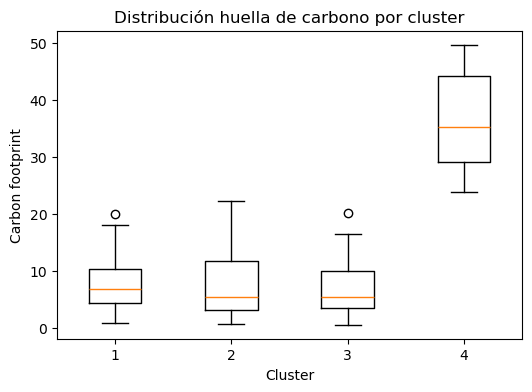

In [21]:
### Ejemplo extra para comparar `carbon_footprint` por cluster:

# Perfil de clusters
cc_dataset['cluster_kmeans'] = labels_k
cluster_profile = cc_dataset.groupby('cluster_kmeans')[features].mean()
cluster_profile

# Boxplot de carbon_footprint por cluster
plt.figure(figsize=(6,4))
plt.boxplot([cc_dataset.loc[cc_dataset['cluster_kmeans']==c,'carbon_footprint'] for c in sorted(cc_dataset['cluster_kmeans'].unique())])
plt.xlabel('Cluster')
plt.ylabel('Carbon footprint')
plt.title('Distribución huella de carbono por cluster')
plt.show()


In [13]:
# Seleccionar variables relevantes
features = ["carbon_footprint", "price", "recyclable_packaging", "local_origin", "sustentabilidad_score"]

X = cc_dataset[features]

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[ 0.27530737,  0.78491787, -1.6583124 , -0.79399923, -1.75592139],
       [-0.52032923,  1.4205943 ,  0.60302269,  1.25944706,  1.46286027],
       [-0.22461576, -0.08745433,  0.60302269,  1.25944706,  1.38192497],
       [-0.39311664, -0.54920212,  0.60302269, -0.79399923, -0.07246713],
       [-0.42770954,  1.70513864,  0.60302269, -0.79399923, -0.06299923]])

In [14]:
# Definir número de clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Agregar al dataset
cc_dataset["Cluster"] = clusters

cc_dataset.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,id,name,category,price,quantity,status,carbon_footprint,recyclable_packaging,local_origin,text,cluster,carbon_score,price_score,sustentabilidad_score,score,Cluster
0,1,Tabla de cortar de cera (Hecho a mano) 22222,Hogar,145.06,1,disponible,11.76,0,0,Hogar 0 0,0,0.772440,0.281642,0.257480,0.258572,1
1,2,Miel pura de orgánico (Energético),Alimentos,180.00,1,disponible,4.63,1,1,Alimentos 1 1,0,0.917566,0.102168,0.972522,0.312190,2
2,3,Bolsa de tela de upcycled (Multiusos),Otro,97.11,69,disponible,7.28,1,1,Otro 1 1,3,0.863627,0.527943,0.954542,0.454451,2
3,4,Hilo dental de orgánico (Dermatológico),Salud,71.73,68,disponible,5.77,1,0,Salud 1 0,0,0.894362,0.658311,0.631454,0.321098,0
4,7,Jabón de Sin quimicos (Sin fragancia),Limpieza,195.64,45,disponible,5.46,1,0,Limpieza 1 0,1,0.900672,0.021831,0.633557,0.444433,0


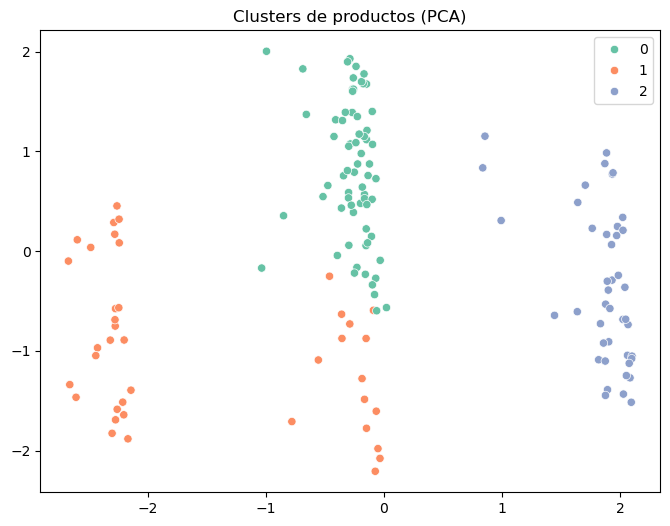

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2")
plt.title("Clusters de productos (PCA)")
plt.show()


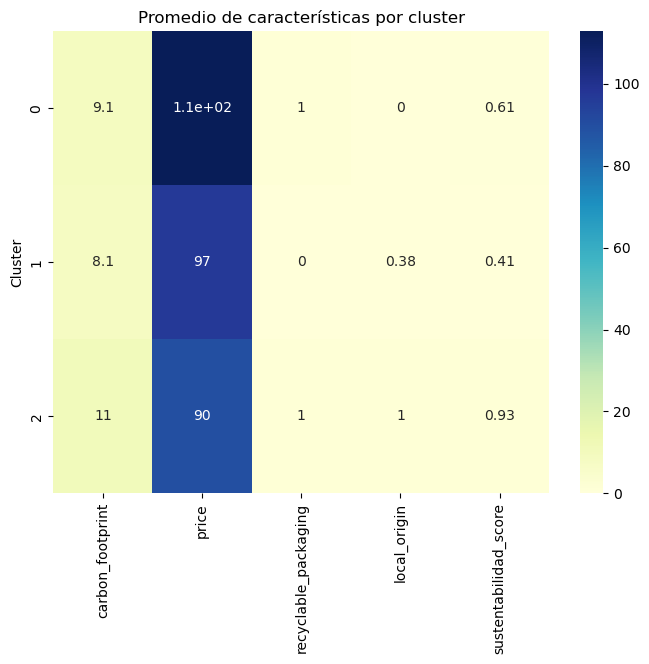

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(cc_dataset.groupby("Cluster")[features].mean(), annot=True, cmap="YlGnBu")
plt.title("Promedio de características por cluster")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7080\1411131187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="price", data=cc_dataset, palette="Set2")


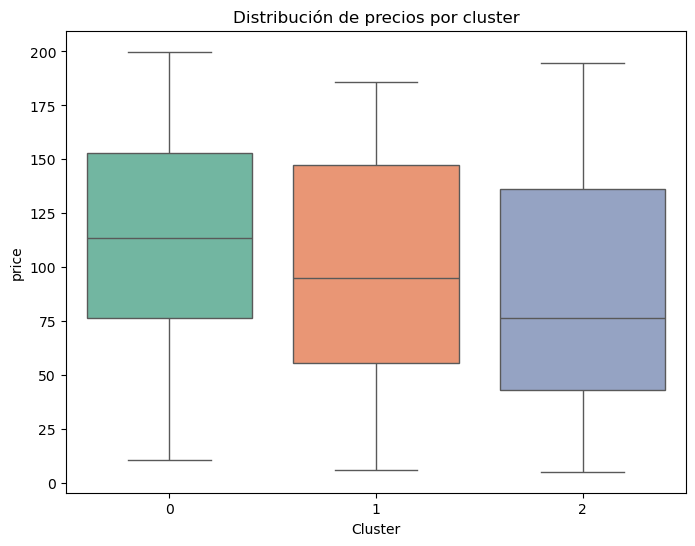

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="price", data=cc_dataset, palette="Set2")
plt.title("Distribución de precios por cluster")
plt.show()
